## Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

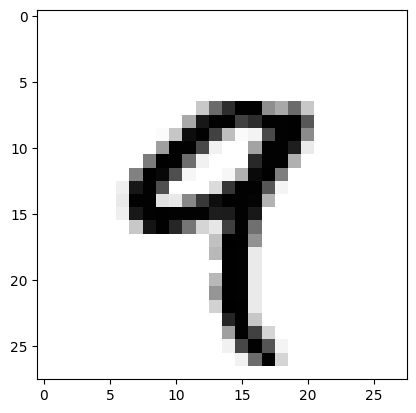

In [20]:
plt.imshow(X_train[y_train.astype(np.int8) == 9][0].reshape(28,28), cmap='binary')
plt.show()

In [23]:
from sklearn.datasets import make_blobs

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

In [24]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

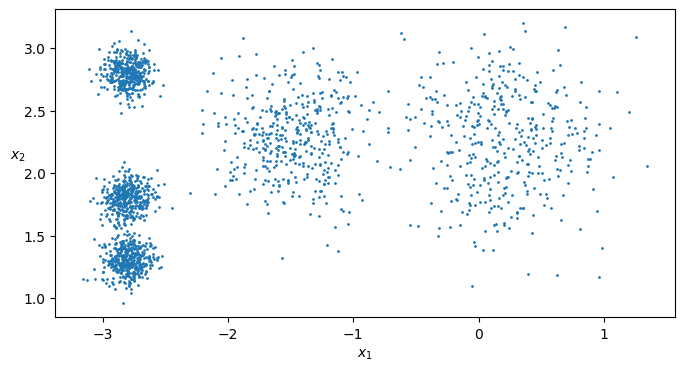

In [25]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

## KMeans

### Finding the optimal number of clusters

#### Elbow Method

In [22]:
from sklearn.cluster import KMeans

In [29]:
kmeans_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias_k = [model.inertia_ for model in kmeans_k]

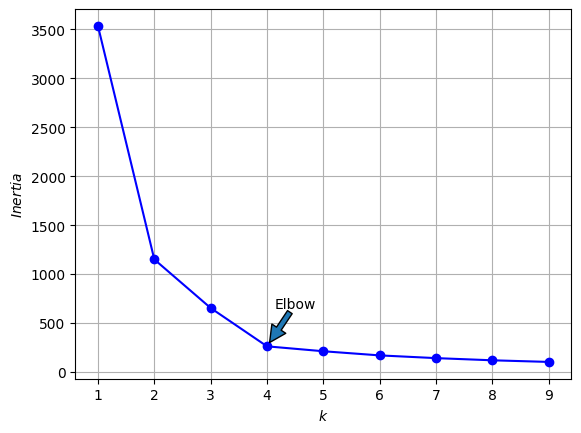

In [42]:
plt.plot(range(1, 10), inertias_k, 'bo-')
plt.xlabel("$k$")
plt.ylabel("$Inertia$")
# Annotate with arrow
plt.annotate("", xy=(4, inertias_k[3]), xytext=(4.45, 650), arrowprops=dict(shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.grid()
plt.show()

#### Silhoute Score Method

In [43]:
from sklearn.metrics import silhouette_score

In [158]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_k[1:]]

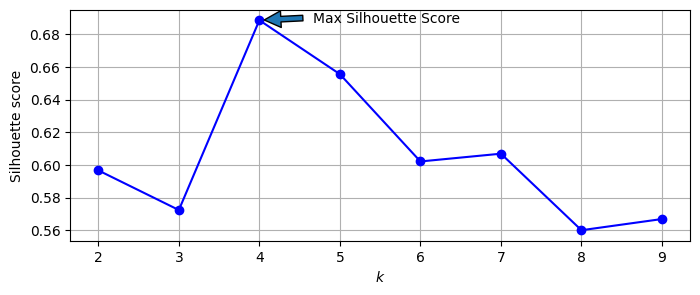

In [159]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.annotate("", xy=(4, silhouette_scores[2]), xytext=(4.6, 0.69), arrowprops=dict(shrink=0.1))
plt.text(4.665,0.687,'Max Silhouette Score')
# Annotate with arrow
plt.grid()
plt.show()

**An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram:**

In [160]:
from sklearn.metrics import silhouette_samples

from matplotlib.ticker import FixedLocator, FixedFormatter

775
0.48118300085126253
[453]
423
0.7833893852596064
[453, 1118]
802
0.8101236195965136
[453, 1118, 1797]


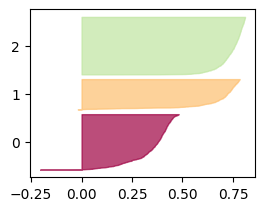

In [161]:
for k in (3,):
    
    plt.subplot(2, 2, k - 2)
    y_pred = kmeans_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    
    padding = len(X) // 30 #give gap between each kth cluster 
    pos = padding
    ticks = []
    # each cluster in `k clusters`
    for cluster in range(3):
        coeffs = silhouette_coefficients[y_pred == cluster]
        coeffs.sort()
        print(len(coeffs))
        print(max(coeffs))
        # print(coeffs)
        color = plt.cm.Spectral(cluster / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), coeffs, 0,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
        print(ticks)
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    
    #uncomment to see
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k))) # change ticks to --> [0, 1]

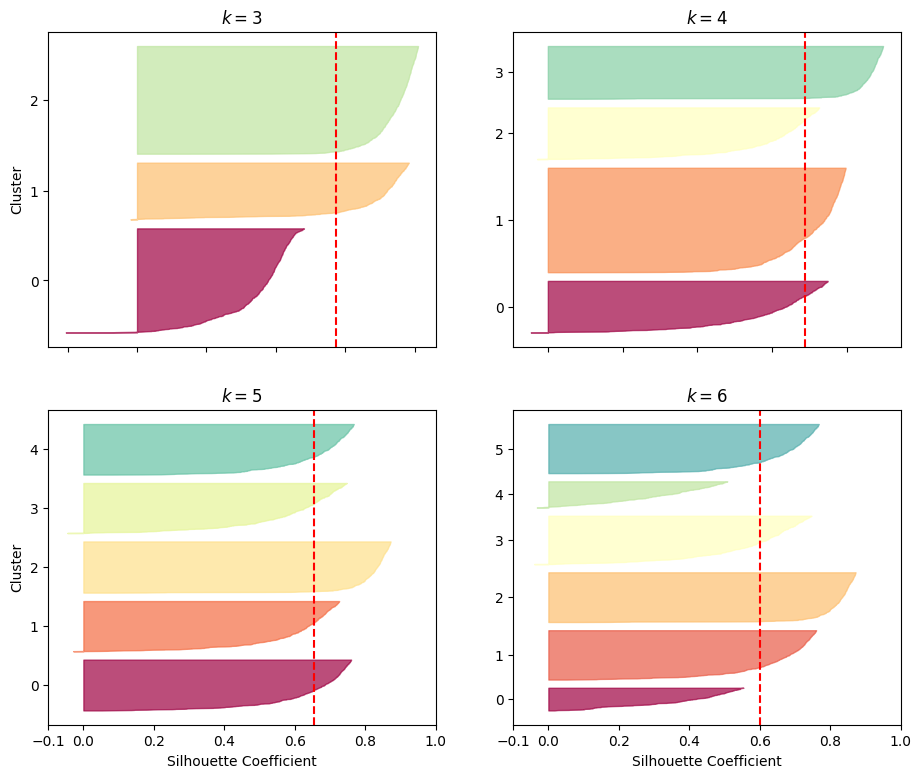

In [163]:
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), coeffs, 0, 
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()